<a href="https://colab.research.google.com/github/JatinChaudhary0319/Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Customer Churn Model**

**Objective**

In [391]:
#A real world problem to build a model to predict which customers are likely to retain or likely to leave bank in future by handling imbalance data using random under sampling and random over sampling along with hyperparameter tuning.

**Data Source**

In [392]:
#From YBI gihub dataset repository

**Import Library**

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [394]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

**Describe Data**

In [395]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [397]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [398]:
df.duplicated('CustomerId').sum()

0

In [399]:
df = df.set_index('CustomerId')

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Data Visualization**

<Axes: xlabel='CustomerId'>

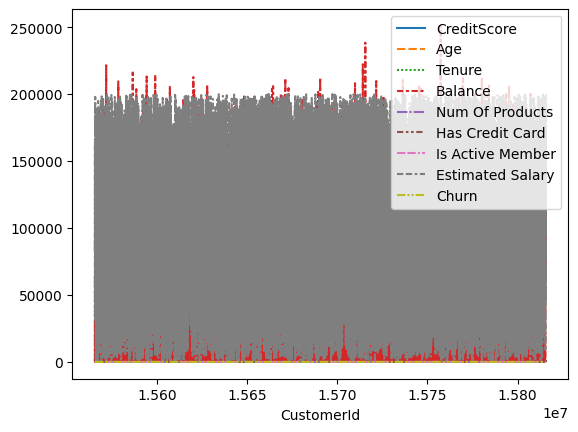

In [401]:
sns.lineplot(data = df)

<Axes: xlabel='Churn', ylabel='count'>

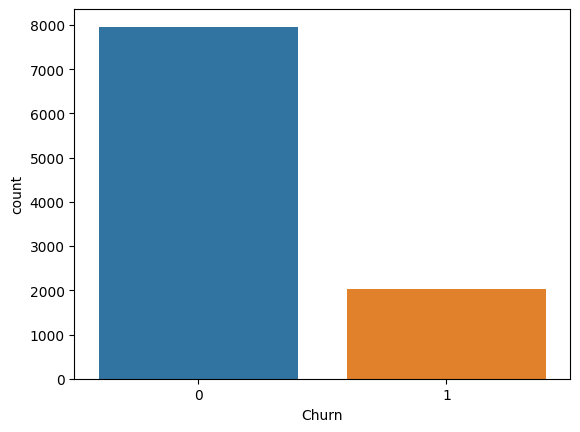

In [402]:
sns.countplot(x = 'Churn', data = df)

**Data Preprocessing**

In [403]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [404]:
df.replace({'Geography':{'France':2, 'Germany':1, 'Spain':0}}, inplace=True)

In [405]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [406]:
df.replace({'Gender': {'Male':0, 'Female':1}}, inplace=True)

In [407]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [408]:
df.replace({'Num of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [409]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [410]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [411]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [412]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

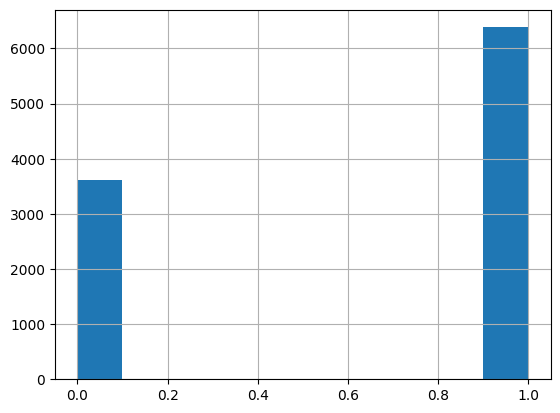

In [413]:
df['Zero Balance'].hist()

In [414]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

In [415]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

**Define Target Variable(y) and Feature variable(X)**

In [416]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [417]:
X = df.drop(['Surname', 'Churn'], axis = 1)

In [418]:
y = df['Churn']

In [419]:
X.shape, y.shape

((10000, 11), (10000,))

**Train Test Split**

In [ ]:
#Random Under Sampling

In [420]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 2529)
X_rus, y_rus = rus.fit_resample(X, y)
X_rus.shape, y_rus.shape

((4074, 11), (4074,))

In [421]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [422]:
y_rus.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

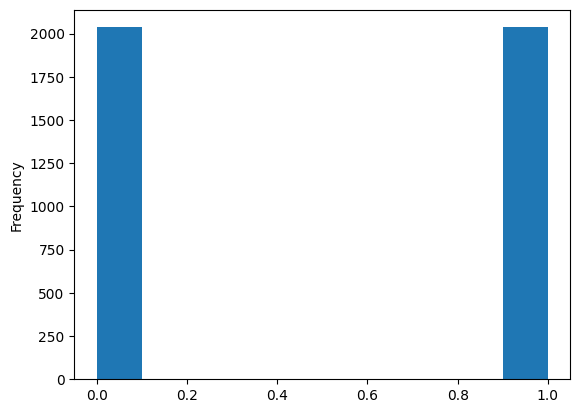

In [423]:
y_rus.plot(kind = 'hist')

In [ ]:
#Random Over Sampling

In [424]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 2529)
X_ros, y_ros = ros.fit_resample(X, y)
X_ros.shape, y_ros.shape

((15926, 11), (15926,))

In [425]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [426]:
y_ros.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<Axes: ylabel='Frequency'>

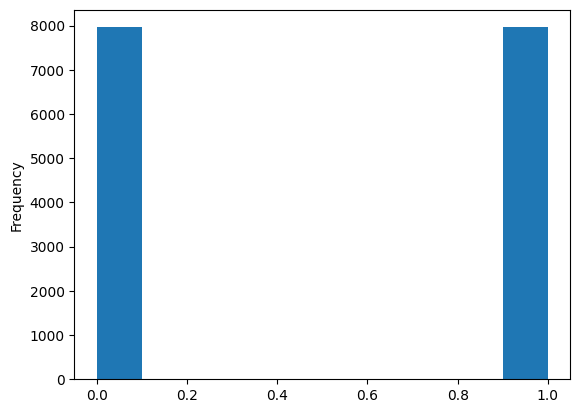

In [427]:
y_ros.plot(kind = 'hist')

In [428]:
from sklearn.model_selection import train_test_split

#Split Original Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2529)

#Split Random Under Sample Data
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size = 0.3, random_state = 2529)

#Split Random Over Sample Data
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 2529)

In [429]:
#Standardize Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [430]:
#Standardize Original Data
X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [431]:
#Standardize Random Under Sample Data
X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

In [432]:
#Standardize Random Over Sample Data
X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])
X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']] = sc.fit_transform(X_test_ros[['CreditScore', 'Age', 'Tenure', 'Balance', 'Estimated Salary']])

**Modeling**

In [433]:
#Support Vector Machine Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [434]:
#Hypermeter Tuning with Original Data
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf'], 'class_weight': ['balanced']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [435]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [436]:
#Model with Random Under Sampling
svc_rus = SVC()
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [437]:
#Hypermeter Tuning with Random Under Sample Data
grid_rus = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)
grid_rus.fit(X_train_rus, y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [438]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [439]:
#Model with Random Over Sampling
svc_ros = SVC()
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [440]:
#Hypermeter Tuning with Random Over Sample Data
grid_ros = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2, cv = 2)
grid_ros.fit(X_train_ros, y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [441]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


**Prediction**

In [442]:
y_pred = svc.predict(X_test)

In [443]:
grid_predictions = grid.predict(X_test)

In [444]:
y_pred_rus = svc_rus.predict(X_test_rus)

In [445]:
grid_predictions_rus = grid_rus.predict(X_test_rus)

In [446]:
y_pred_ros = svc_ros.predict(X_test_ros)

In [447]:
grid_predictions_ros = grid_ros.predict(X_test_ros)

**Model Evaluation**

In [448]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[2380,   34],
       [ 410,  176]])

In [449]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.84      0.30      0.44       586

    accuracy                           0.85      3000
   macro avg       0.85      0.64      0.68      3000
weighted avg       0.85      0.85      0.82      3000



In [450]:
confusion_matrix(y_test, grid_predictions)

array([[2121,  293],
       [ 273,  313]])

In [451]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2414
           1       0.52      0.53      0.53       586

    accuracy                           0.81      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.81      0.81      3000



In [452]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[487, 140],
       [180, 416]])

In [453]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.70      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [454]:
confusion_matrix(y_test_rus, grid_predictions_rus)

array([[490, 137],
       [185, 411]])

In [455]:
print(classification_report(y_test_rus, grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75       627
           1       0.75      0.69      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [456]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1931,  448],
       [ 614, 1785]])

In [457]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      2379
           1       0.80      0.74      0.77      2399

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



In [458]:
confusion_matrix(y_test_ros, grid_predictions_ros)

array([[2084,  295],
       [  59, 2340]])

In [459]:
print(classification_report(y_test_ros, grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      2379
           1       0.89      0.98      0.93      2399

    accuracy                           0.93      4778
   macro avg       0.93      0.93      0.93      4778
weighted avg       0.93      0.93      0.93      4778

